In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/OnlineRetail_new.csv')
df.head()

,InvoiceNo,InvoiceDate,Code,Description,Quantity,Unit,Total,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  int64  
 1   InvoiceDate  397924 non-null  object 
 2   Code         397924 non-null  object 
 3   Description  397924 non-null  object 
 4   Quantity     397924 non-null  int64  
 5   Unit         397924 non-null  float64
 6   Total        397924 non-null  float64
 7   CustomerID   397924 non-null  int64  
 8   Country      397924 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


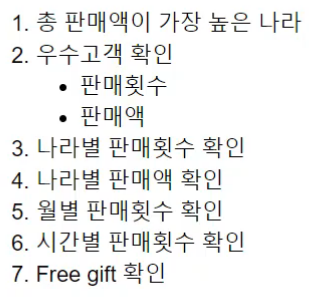

# 총 판매액이 높은 나라

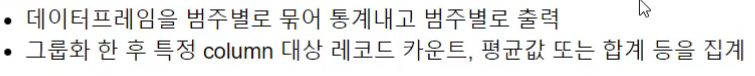

In [4]:
df.groupby('Country')['Total'].sum().sort_values(ascending=False).round()

Country
United Kingdom          7308392.0
Netherlands              285446.0
EIRE                     265546.0
Germany                  228867.0
France                   209024.0
Australia                138521.0
Spain                     61577.0
Switzerland               56444.0
Belgium                   41196.0
Sweden                    38378.0
Japan                     37416.0
Norway                    36165.0
Portugal                  33440.0
Finland                   22546.0
Singapore                 21279.0
Channel Islands           20450.0
Denmark                   18955.0
Italy                     17483.0
Cyprus                    13590.0
Austria                   10199.0
Poland                     7335.0
Israel                     7222.0
Greece                     4761.0
Iceland                    4310.0
Canada                     3666.0
USA                        3580.0
Malta                      2726.0
Unspecified                2667.0
United Arab Emirates       1902.0
Lebano

# 우수고객 확인

## 판매횟수 기준

In [5]:
df.groupby('CustomerID')['InvoiceDate'].count().sort_values(ascending=False).head()

CustomerID
17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
Name: InvoiceDate, dtype: int64

## 판매액 기준

In [6]:
df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head()

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: Total, dtype: float64

## 시각화

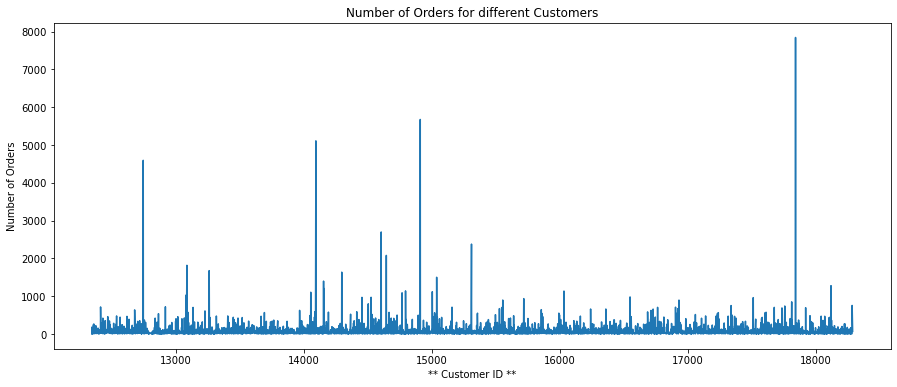

In [7]:
# 판매횟수 기준
orders = df.groupby('CustomerID', as_index=False)['InvoiceDate'].count()

plt.subplots(figsize=(15, 6))
plt.plot(orders['CustomerID'], orders['InvoiceDate'])
plt.xlabel('** Customer ID **')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

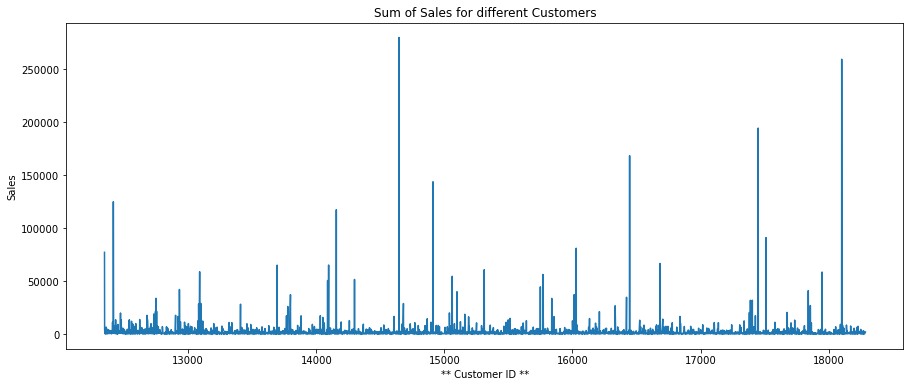

In [8]:
# 판매액 기준
orders = df.groupby('CustomerID', as_index=False)['Total'].sum()

plt.subplots(figsize=(15, 6))
plt.plot(orders['CustomerID'], orders['Total'])
plt.xlabel('** Customer ID **')
plt.ylabel('Sales')
plt.title('Sum of Sales for different Customers')
plt.show()

# 나라별 판매횟수 확인

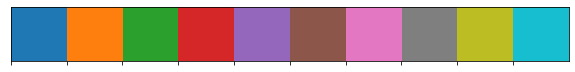

In [9]:
# 시각화 컬러 지정
color = sns.color_palette()
sns.palplot(color)

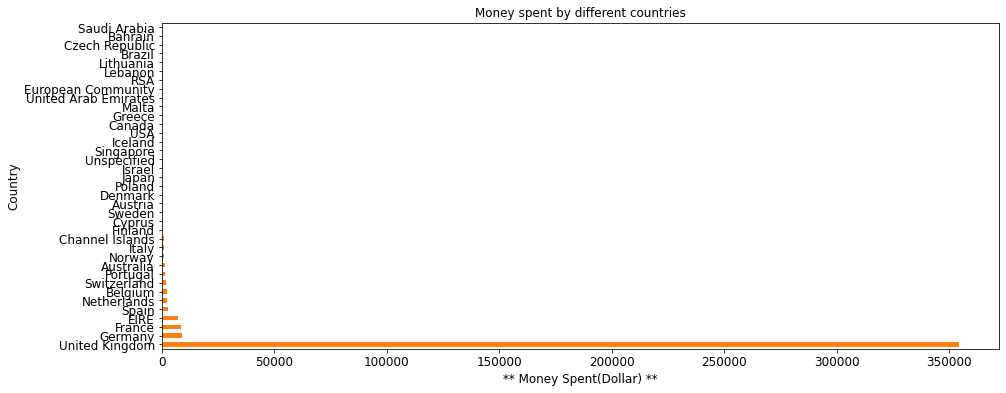

In [10]:
group_country_total = df.groupby('Country')['InvoiceDate'].count().sort_values(ascending=False)

plt.subplots(figsize=(15, 6))
group_country_total.plot(kind='barh', fontsize=12, color=color[1])
plt.xlabel('** Money Spent(Dollar) **', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money spent by different countries')
plt.show()

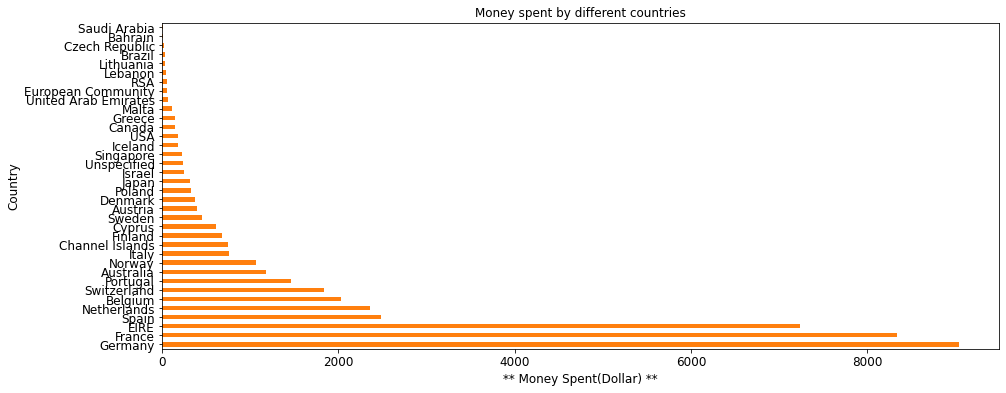

In [11]:
group_country_total = df.groupby('Country')['InvoiceDate'].count().sort_values(ascending=False)
del group_country_total['United Kingdom']

plt.subplots(figsize=(15, 6))
group_country_total.plot(kind='barh', fontsize=12, color=color[1])
plt.xlabel('** Money Spent(Dollar) **', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money spent by different countries')
plt.show()

# 나라별 판매액 확인

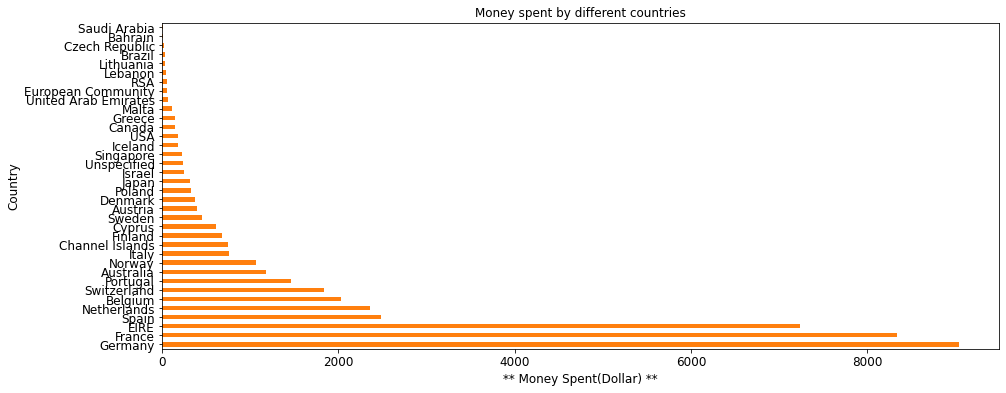

In [12]:
group_country_total = df.groupby('Country')['Total'].count().sort_values(ascending=False)
del group_country_total['United Kingdom']

orders = df.groupby('CustomerID', as_index=False)['InvoiceDate'].count()

plt.subplots(figsize=(15, 6))
group_country_total.plot(kind='barh', fontsize=12, color=color[1])
plt.xlabel('** Money Spent(Dollar) **', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money spent by different countries')
plt.show()

# 월별 판매횟수 확인

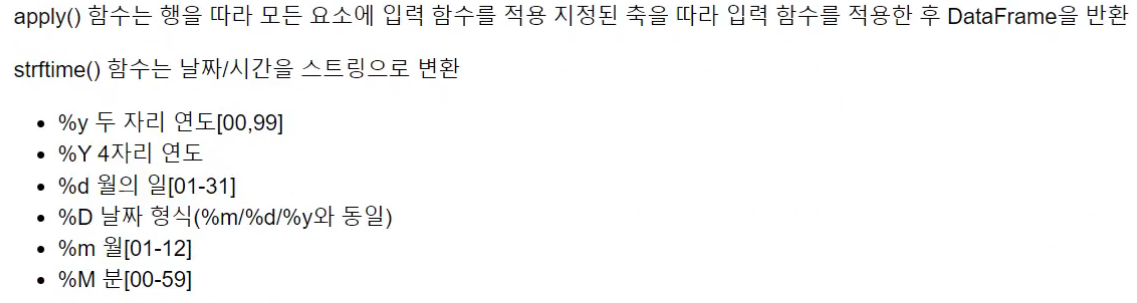

In [13]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

In [14]:
df['Year_Month'] = df['InvoiceDate'].apply(lambda x : x.strftime('%Y-%m'))
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day

df.head()

,InvoiceNo,InvoiceDate,Code,Description,Quantity,Unit,Total,CustomerID,Country,Year_Month,Hour,Day
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010-12,8,1
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010-12,8,1
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010-12,8,1
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010-12,8,1
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010-12,8,1


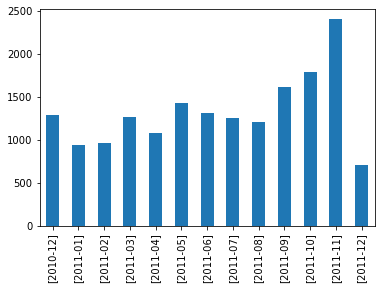

In [15]:
invoice_month = df.groupby('InvoiceDate')['Year_Month'].unique()
invoice_month.value_counts().sort_index().plot.bar();

# 시간별 판매횟수 확인

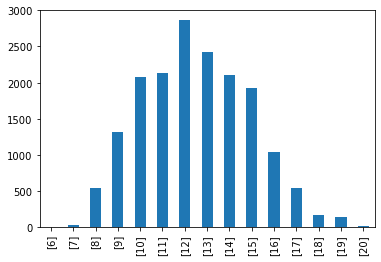

In [16]:
invoice_hour = df.groupby('InvoiceDate')['Hour'].unique()
invoice_hour.value_counts().sort_index().plot.bar();